### Introduction

It is challenging to predict the protein structure in bioinformatics. Correctly predicting only the spinal column of a tertiary structure presents a great difficulty to determinate the flexible torsion angles, as well as angles of the individual side chains. The data can be downloaded from [here.](https://archive.ics.uci.edu/ml/datasets/Physicochemical+Properties+of+Protein+Tertiary+Structure)

Attributes Information:

**RMSD**-Size of the residue.\
**F1** - Total surface area.\
**F2** - Non polar exposed area.\
**F3** - Fractional area of exposed non polar residue.\
**F4** - Fractional area of exposed non polar part of residue.\
**F5** - Molecular mass weighted exposed area.\
**F6** - Average deviation from standard exposed area of residue.\
**F7** - Euclidian distance.\
**F8** - Secondary structure penalty.\
**F9** - Spacial Distribution constraints (N,K Value).\

Objective: — To find out which model is fast and high accuracy in predicting root mean square deviation.

#### Import Libraries

In [115]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import pandas as pd
from configparser import Interpolation
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from numpy import ndenumerate
from sklearn.neural_network import MLPRegressor
from sklearn.metrics import r2_score, mean_squared_error
plt.style.use('default')
%matplotlib inline

#### Load the dataset

In [38]:
data = pd.read_csv('CASP.csv')
data.head()


,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
0,17.284,13558.30,4305.35,0.31754,162.1730,1.872791e+06,215.3590,4287.87,102,27.0302
1,6.021,6191.96,1623.16,0.26213,53.3894,8.034467e+05,87.2024,3328.91,39,38.5468
2,9.275,7725.98,1726.28,0.22343,67.2887,1.075648e+06,81.7913,2981.04,29,38.8119
3,15.851,8424.58,2368.25,0.28111,67.8325,1.210472e+06,109.4390,3248.22,70,39.0651
4,7.962,7460.84,1736.94,0.23280,52.4123,1.021020e+06,94.5234,2814.42,41,39.9147


#### Statistical Insights

In [39]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45730 entries, 0 to 45729
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RMSD    45730 non-null  float64
 1   F1      45730 non-null  float64
 2   F2      45730 non-null  float64
 3   F3      45730 non-null  float64
 4   F4      45730 non-null  float64
 5   F5      45730 non-null  float64
 6   F6      45730 non-null  float64
 7   F7      45730 non-null  float64
 8   F8      45730 non-null  int64  
 9   F9      45730 non-null  float64
dtypes: float64(9), int64(1)
memory usage: 3.5 MB


This list is 10 columns and all labels are numerical(labelled as 'int' and 'float')

In [40]:
data.describe()

,RMSD,F1,F2,F3,F4,F5,F6,F7,F8,F9
count,45730.000000,45730.000000,45730.000000,45730.000000,45730.000000,4.573000e+04,45730.000000,45730.000000,45730.000000,45730.000000
mean,7.748528,9871.596995,3017.367175,0.302392,103.492433,1.368299e+06,145.638061,3989.755990,69.975071,34.523664
std,6.118312,4058.138034,1464.324663,0.062886,55.424985,5.640367e+05,69.999230,1993.574575,56.493443,5.979755
min,0.000000,2392.050000,403.500000,0.092500,10.310100,3.194902e+05,31.970400,0.000000,0.000000,15.228000
25%,2.305000,6936.680000,1979.045000,0.258740,63.563900,9.535912e+05,94.757500,3165.322500,31.000000,30.424725
50%,5.030000,8898.805000,2668.155000,0.300150,87.740800,1.237219e+06,126.176000,3840.170000,54.000000,35.299300
75%,13.379000,12126.150000,3786.410000,0.342890,133.646750,1.690920e+06,181.468500,4644.192500,91.000000,38.870800
max,20.999000,40034.900000,15312.000000,0.577690,369.317000,5.472011e+06,598.408000,105948.170000,350.000000,55.300900


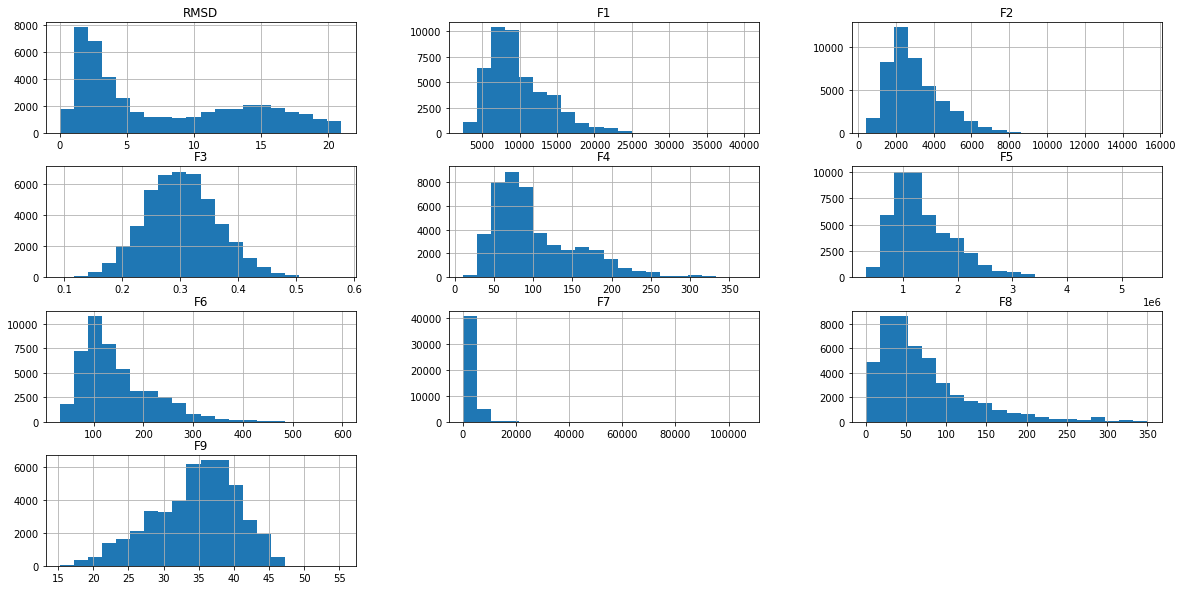

In [41]:
data.hist(bins=20, figsize=(20,10))
plt.show()

In [42]:
np.any(data.values == np.nan)

False

C:\Users\user\AppData\Local\Temp\ipykernel_3712\799249608.py:10: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_xticklabels([''] + list(data));
C:\Users\user\AppData\Local\Temp\ipykernel_3712\799249608.py:11: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax.set_yticklabels(['']+list(data));


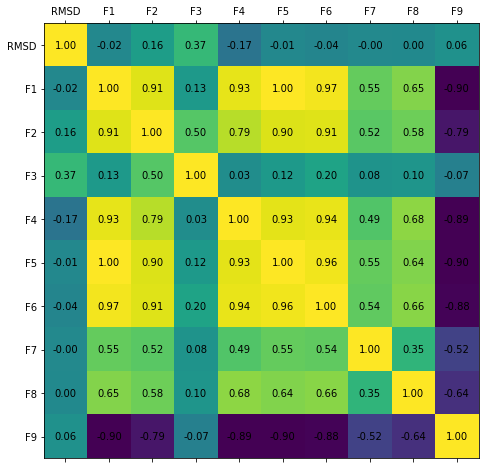

In [43]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111)
cax = ax.matshow(data.corr(), interpolation='none')

for (i,j), value in np.ndenumerate(data.corr()):
    plt.text(i,j, f"{value:.2f}", va = "center", ha = "center")

ax.xaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1))
ax.yaxis.set_major_locator(matplotlib.ticker.MultipleLocator(1))
ax.set_xticklabels([''] + list(data));
ax.set_yticklabels(['']+list(data));
plt.show()
    

In [44]:
data.corr()['RMSD'].sort_values(ascending= False)

RMSD    1.000000
F3      0.374309
F2      0.156895
F9      0.062830
F8      0.000344
F7     -0.003339
F5     -0.013982
F1     -0.015087
F6     -0.036135
F4     -0.169771
Name: RMSD, dtype: float64

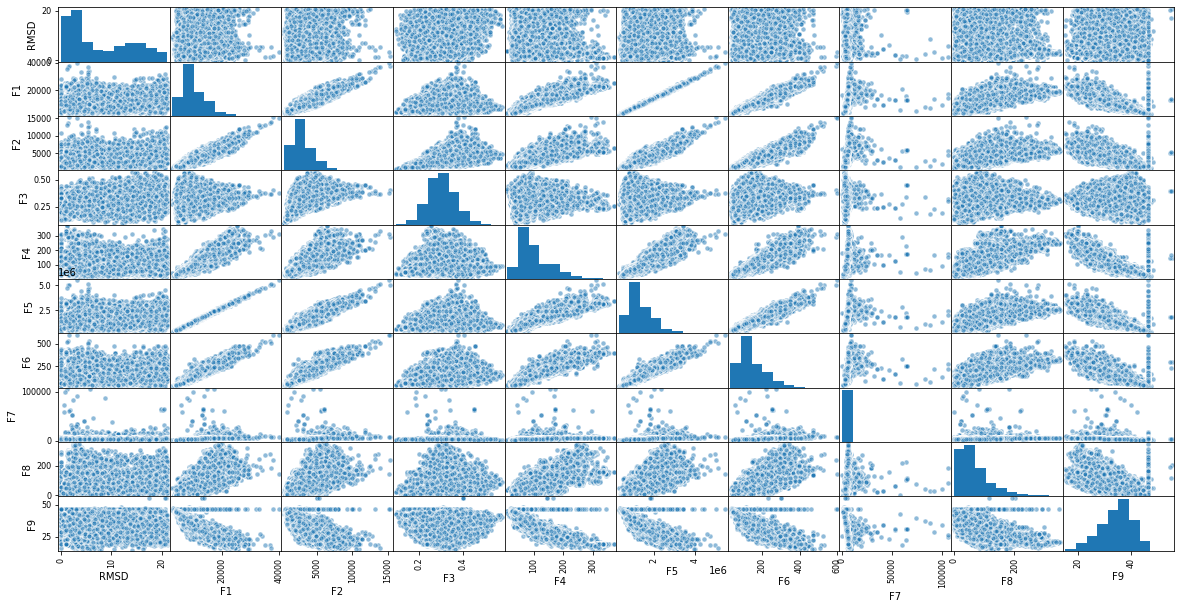

In [45]:
pd.plotting.scatter_matrix(data, figsize=(20,10), edgecolors='w',s=100)
plt.show()

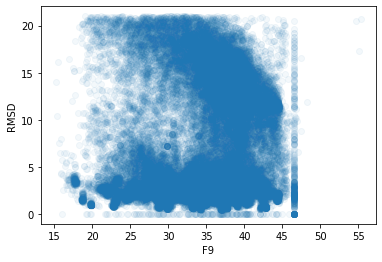

In [46]:
plt.scatter(data['F9'], data['RMSD'], alpha=0.05);
plt.xlabel('F9');
plt.ylabel('RMSD');

In [47]:
data_cleaned = data[data['F9']<46]
data_cleaned = data_cleaned[data_cleaned['RMSD'] > 0.1]
data_cleaned = data_cleaned.reset_index().drop('index',axis=1)

Text(0, 0.5, 'RMSD')

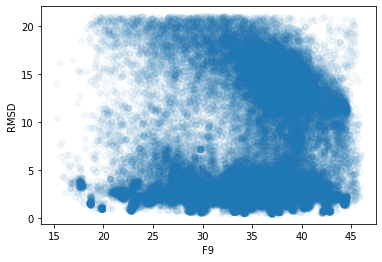

In [48]:
plt.scatter(data_cleaned['F9'],data_cleaned['RMSD'],alpha=0.05);
plt.xlabel('F9');
plt.ylabel('RMSD')

Separate training set and test set from data set. In this project, we will make use of strafified sampling for training and test set seperation. In this case, we pick F3 for creating the categories since itcorrelates with RSMD the highest. Suppose, we are told that any other variable is important from the standpoint of retaining the same statistics for the test set as that of train set, we would use that variable to create the caetgories and sample the dataset from. In this case , start with haveing six categories fo F3 data.

In [49]:
data_cleaned['F3_cat'] = pd.cut(data_cleaned['F3'], bins=[0, 0.1, 0.2, 0.3, 0.4, 0.5, np.inf], labels = [1, 2, 3, 4, 5, 6])

In [50]:
data_cleaned['F3_cat'].value_counts()/len(data_cleaned)

3    0.451977
4    0.435600
5    0.065732
2    0.044472
6    0.002153
1    0.000067
Name: F3_cat, dtype: float64

<AxesSubplot:>

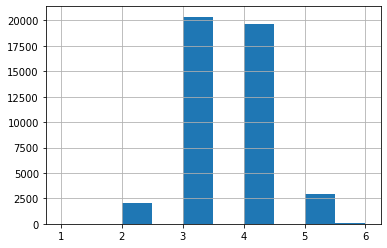

In [51]:
data_cleaned['F3_cat'].hist()

In [52]:
split = StratifiedShuffleSplit(n_splits=1, test_size = 0.2, random_state=42)
for train_index, test_index in split.split(data_cleaned, data_cleaned["F3_cat"]):
    data_train_set = data_cleaned.loc[train_index]
    data_test_set = data_cleaned.loc[test_index]

It appears that the category counts for training set of L3 is matching with the original dataset.

In [53]:
data_train_set['F3_cat'].value_counts()/len(data_train_set)

3    0.451968
4    0.435602
5    0.065744
2    0.044467
6    0.002164
1    0.000055
Name: F3_cat, dtype: float64

In [54]:
for set_ in (data_train_set, data_test_set):
    set_.drop("F3_cat", axis=1, inplace=True)

In [55]:
x_train, y_train =data_train_set.drop("RMSD", axis=1), data_train_set["RMSD"]
x_test, y_test = data_test_set.drop("RMSD", axis=1), data_test_set['RMSD']

As a last step, scale the variables of the input data using StandardScaler function. As we had noted earlier, the inputs are correlated with one another. Use PCA to project the inputs onto an independent bases. It will make model learning more efficient. Use 0.99 for `n_components` hyperparameter and let the algorithm find out how many number of independent bases it takes to reconstruct the inputs such that, 99% variance is recovered.

Combine these two operations using Pipeline module. Notice we will only scale the inputs, the outputs remain untouched.

In [56]:
pipeline = Pipeline([
            ('std_scaler', StandardScaler()),
            ('pca', PCA(n_components=0.99))
])
x_train_scaled = pipeline.fit_transform(x_train)

### Model Selection, 

In [123]:
%%time
lin_reg = LinearRegression()
lin_reg.fit(x_train_scaled, y_train)

CPU times: total: 15.6 ms
Wall time: 6.48 ms


LinearRegression()

In order to get a fell of how the model is performing visually, randomly pick 10 values from training set, predict the target
value and plot it against the ground-truth. Encapsulate this in a function to plot the result as we will use it in multiple places.

In [58]:
def plot_results(X,y,model, title_text):
    plt.figure(figsize=(5,5))
    y_pred = model.predict(X)
    plt.scatter(y_pred,y)
    plt.plot([y_pred.min(),y_pred.max()],[y.min(),y.max()],'k')
    plt.xlabel("Predicted")
    plt.xlabel("Actual")
    plt.title(title_text)

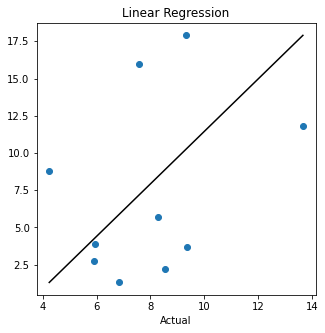

In [59]:
r = np.random.RandomState(42)
indices = r.choice(x_train_scaled.shape[0],10)
x_selected = x_train_scaled[indices]
y_selected = y_train.values[list(indices)]
plot_results(x_selected, y_selected, lin_reg, 'Linear Regression')


Let's use random forest regression model for this problem and see if that is better in terms of prediction accuracy. Make use of K-fold Cross Validation approach to make sure that the model is not overfitting the data.

### Random Forest Regressor

In [121]:
%%time
forest_reg = RandomForestRegressor()
forest_reg.fit(x_train_scaled, y_train)

CPU times: total: 12.8 s
Wall time: 12.8 s


RandomForestRegressor()

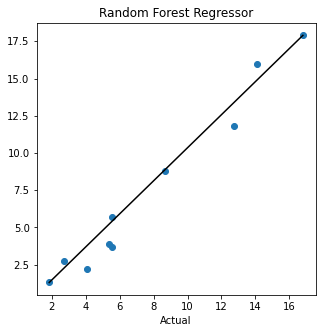

In [77]:
plot_results(x_selected, y_selected, forest_reg, "Random Forest Regressor")

Random Forest Regressor definitely works better compared to linear Regression. Thew randomly sampled points from the training set lie closer to the line, indicating a small prediction error(distance indicates mean squared error-More the distance, more the error in the prediction and vice versa).

Use cross_val_score function from scikit-learn to reandomly create 5 folds(controlled by hyparameter cv) of training data, train the model on 4 sets and test on the remaining one. In this way, it will let us know if the model is overfitting the data.

In [80]:
scores = cross_val_score(forest_reg, x_train_scaled, y_train, scoring ='neg_mean_squared_error',cv=5)

In [81]:
def display_scores(scores):
    print("Scores:", scores)
    print("Mean:", scores.mean())
    print("Standard deviation:",scores.std())

In [82]:
display_scores(np.sqrt(-scores))

Scores: [3.91394265 3.83876453 3.8636798  3.87624556 3.8727749 ]
Mean: 3.873081489023029
Standard deviation: 0.02427255530619303


The mean score for Random Forest model is 3.9 and the standard deviation is 0.02. Th mean score here indicates the average (over 5 folds) of root mean square error between the model prediction and the actual outputs. Let's try cross validation for Linear Regression as well.

In [83]:
scores = cross_val_score(lin_reg, x_train_scaled, y_train, scoring="neg_mean_squared_error",cv=5)

In [84]:
display_scores(np.sqrt(-scores))

Scores: [5.16936473 5.12840384 5.20475787 5.17569804 5.19324947]
Mean: 5.174294788766649
Standard deviation: 0.02615161014197285


Random Forest Regressor stands out in terms of accuracy.
By default, the number of estimators(one of the hyperparameters) for random forest is chosen as 100. Try to refine the model's hyperparameter using Grid Search metho.In this particular case, Grid Search will run 4X2 = 8 with 3 folds of input data to generate scores.

In [92]:
param_grid = [{'n_estimators':[10, 100, 150, 300]}, {'bootstrap': [False], 'n_estimators':[10, 100, 150, 300]}]
forest_reg = RandomForestRegressor()
grid_search = GridSearchCV(forest_reg, param_grid, cv=3, scoring='neg_mean_squared_error', return_train_score=True)

In [93]:
grid_search.fit(x_train_scaled,y_train)

GridSearchCV(cv=3, estimator=RandomForestRegressor(),
             param_grid=[{'n_estimators': [10, 100, 150, 300]},
                         {'bootstrap': [False],
                          'n_estimators': [10, 100, 150, 300]}],
             return_train_score=True, scoring='neg_mean_squared_error')

Display the scores and parameters for all the 8 models.

In [94]:
results = grid_search.cv_results_
for mean_scores, params in zip(results['mean_test_score'], results['params']):
    print(np.sqrt(-mean_scores), params)

4.129019801330912 {'n_estimators': 10}
3.936046472364763 {'n_estimators': 100}
3.9255067105481483 {'n_estimators': 150}
3.918223450142722 {'n_estimators': 300}
5.372356609371409 {'bootstrap': False, 'n_estimators': 10}
5.359373088217887 {'bootstrap': False, 'n_estimators': 100}
5.359048186939102 {'bootstrap': False, 'n_estimators': 150}
5.35790890401714 {'bootstrap': False, 'n_estimators': 300}


Clearly the model with 300 n_estimators performs best, although the performance saturates after 100. Select this model from all the 8 combinations and use for predictions.

In [95]:
best_models_forest = grid_search.best_estimator_
grid_search.best_estimator_

RandomForestRegressor(n_estimators=300)

### ANN

Try to see if an ann can be trained using this dataset. Use MLPRegressor to create a neural network with 2 hidden layers. The hidden layers have 100 and 10 nerons respectively. Let the validation fraction be 30% and se early_stoppng to True so that the model does not overlearn.

In [105]:
mlp_regressor = MLPRegressor(hidden_layer_sizes=(100,10),
                            tol =1e-4, max_iter = 1000, 
                            random_state = 42,
                            learning_rate_init=1e-2,
                            learning_rate='adaptive',
                            validation_fraction=0.3,
                            early_stopping=True)

In [106]:
%%time
mlp_regressor.fit(x_train_scaled, y_train)

CPU times: total: 10.3 s
Wall time: 6.96 s


MLPRegressor(early_stopping=True, hidden_layer_sizes=(100, 10),
             learning_rate='adaptive', learning_rate_init=0.01, max_iter=1000,
             random_state=42, validation_fraction=0.3)

Plot the the loss curve and validation curves

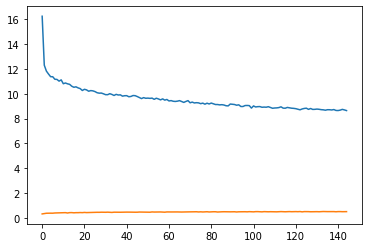

In [107]:
plt.plot(mlp_regressor.loss_curve_)
plt.plot(mlp_regressor.validation_scores_)

With ANN, we can use early_stopping hyperparameter which makes sure that the model stops learning as soon as the model performs better on trainng set compared to validation set(set suing validation_fraction hyperparameter). This inhibits overlearning intrinsically, san so, we need not use cross_val_score to check overlearning while working with ANNS

In [108]:
param_grid = [{'hidden_layer_sizes':[(500,50), (500,10), (100,10), (10,1)]}]
grid_search = GridSearchCV(mlp_regressor, param_grid, cv=3, scoring='neg_mean_squared_error',return_train_score=True)

In [109]:
grid_search.fit(x_train_scaled,y_train)

GridSearchCV(cv=3,
             estimator=MLPRegressor(early_stopping=True,
                                    hidden_layer_sizes=(100, 10),
                                    learning_rate='adaptive',
                                    learning_rate_init=0.01, max_iter=1000,
                                    random_state=42, validation_fraction=0.3),
             param_grid=[{'hidden_layer_sizes': [(500, 50), (500, 10),
                                                 (100, 10), (10, 1)]}],
             return_train_score=True, scoring='neg_mean_squared_error')

Display the scores and parameters for all the 24 models.

In [112]:
results = grid_search.cv_results_
for mean_scores, params in zip(results['mean_test_score'], results['params']):
    print(np.sqrt(-mean_scores), params)

4.247793681157825 {'hidden_layer_sizes': (500, 50)}
4.291371180294593 {'hidden_layer_sizes': (500, 10)}
4.4628431138504565 {'hidden_layer_sizes': (100, 10)}
4.824958658876211 {'hidden_layer_sizes': (10, 1)}


It is clear that (500,50) hidden_layer_sizes performs best. Select this model all the 24 combinations and used it for predictions

In [113]:
best_model = grid_search.best_estimator_
grid_search.best_estimator_

MLPRegressor(early_stopping=True, hidden_layer_sizes=(500, 50),
             learning_rate='adaptive', learning_rate_init=0.01, max_iter=1000,
             random_state=42, validation_fraction=0.3)

In [116]:
x_test_scaled = pipeline.transform(x_test)
y_pred = best_model.predict(x_test_scaled)
r2_score(y_pred, y_test), np.sqrt(mean_squared_error(y_pred, y_test))

(0.2530671287079199, 4.149914144241901)

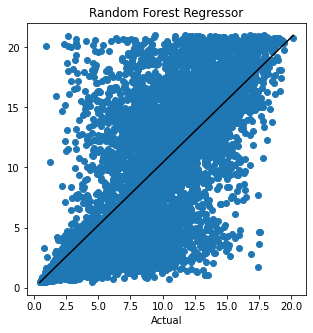

In [118]:
plot_results(x_test_scaled, y_test, best_models_forest, "Random Forest Regressor")

#### Conclusion

So far, we have walked through the following steps:
* Data Preprocessing:
    * Data visualizing - Correlations plots, Bar chart etc.
    * Train test split - Stratified Sampling
    * Scaling - Standard scaling
    * Dimensionality Reduction - PCA with 99% explained variance
* Model Selection:
    * Linear Model
    * Random Forest Regressor
    * Artificial Neural Networks
    * GridSearch for better hyperparameters selection

|Model|Mean RMSE score|Wall Times|
|-----|---------------|----------|
|Linear Model|5.1|6.48[ms]|
|Random Forest Regressor|3.8|12.8[s]|
|Artificial Neural Network(ANN)|4.2|10.3[s]|

At this point, we can conclude the following:
* The linear regression model is very fast to compute but suffers from low accuracy
* Random Forest Regressor and ANN both perform beter than linear Regression model and one of these should be chosen as
a suitable model
* The specific model to be chosen for this is a tradoff between:
  * Speed of prediction vs Accuracy
  * Computational resources available at prediction stage vs model complexity
  * Model updation considerations
  * Explainability of Random Forest vs black box ANN model
  * The final decision on the machine learning model will be chosen after doing a trade-off considering the factors
  discussed above. It seems that the Random Forest Regressor seems to be better keeping accuracy , speed.